<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_12-Classification_I/Classification_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification I

Your Name

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link

## Review

*

## Final Project

* https://docs.google.com/document/d/16Iwx1p8apOar2q89Ev7yLoO8f3HOV7zOLfgKBnG_fuU/edit?usp=sharing

## Binary Logistic Regression

### Linear Regression

$y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=5)
df = pd.DataFrame(data=X)
print(df.head())
df.describe()

          0         1         2         3         4
0  0.796145  0.489813  0.791443 -0.854204  1.094056
1  0.011464  2.266413  1.284947  0.838914 -2.342162
2 -0.416086 -0.508418 -0.624105  1.178999 -0.534794
3 -0.975727  0.067951 -0.988485  0.570426 -0.538775
4  0.412477  0.415989 -1.319966 -0.337618  0.118350


,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.003697,0.008832,-0.028651,0.008531,-0.029181
std,1.007322,0.980093,1.041746,0.968217,0.968494
min,-3.251535,-3.230569,-3.637645,-4.029288,-3.679679
25%,-0.688999,-0.621153,-0.750694,-0.601823,-0.696364
50%,0.002873,-0.006217,-0.025163,-0.008888,0.007886
75%,0.640760,0.669753,0.656138,0.675474,0.612229
max,2.980573,2.899474,3.116180,3.051477,3.093909


The "68-95-99.7 rule," also known as the empirical rule, is a statistical guideline for normal distributions, stating that approximately 68% of data falls within one standard deviation of the mean, 95% within two, and 99.7% within three.

In [ ]:
# Define the lower and upper bounds
lower_bound = -3
upper_bound = 3

# Iterate through each column (variable) and calculate the percentage
for col in df.columns:
    # Create a boolean mask for values within the specified range for the current column
    within_range = (df[col] >= lower_bound) & (df[col] <= upper_bound)

    # Calculate the percentage of values within the range for the current column
    percent_within_range = within_range.sum() / len(df) * 100

    # Display the result for the current column
    print(f"Variable {col}: {percent_within_range:.2f}% of values are between -3 and 3")

Variable 0: 99.80% of values are between -3 and 3
Variable 1: 99.90% of values are between -3 and 3
Variable 2: 99.60% of values are between -3 and 3
Variable 3: 99.50% of values are between -3 and 3
Variable 4: 99.80% of values are between -3 and 3


### Why Logistic Regression

The reason logistic regression has the word "regression" in its name is due to its **historical and statistical relationship to linear regression**.

Here's a breakdown of why:

* **Modeling a Relationship:** Like linear regression, logistic regression aims to **model the relationship** between a set of predictor variables (independent variables) and an outcome variable (dependent variable). In linear regression, the outcome variable is continuous. In logistic regression, the outcome variable is **binary** (or sometimes ordinal or multinomial, but the core concept starts with binary).

* **Linear Combination of Predictors:** At its heart, logistic regression uses a **linear combination of the predictor variables** to estimate the outcome. This is the same fundamental structure as in linear regression:

    ```
    Linear Regression:  y = β₀ + β₁x₁ + β₂x₂ + ... + ε
    Logistic Regression (in the logit space): log(p / (1 - p)) = β₀ + β₁x₁ + β₂x₂ + ...
    ```

    Notice the right-hand side of both equations is a linear combination of the predictors and their coefficients (the β values).

* **Predicting a Value (Indirectly):** While linear regression directly predicts the value of the continuous outcome, logistic regression **indirectly** predicts the probability of the binary outcome belonging to a specific category (usually coded as 1). This probability is then used for classification.

* **Mathematical Foundation:** Many of the statistical concepts and techniques used in logistic regression, such as maximum likelihood estimation for finding the coefficients and hypothesis testing for their significance, have their roots in the broader field of regression analysis.

**Think of it this way:**

Logistic regression takes the familiar linear regression framework and applies a **transformation (the logit function)** to the outcome variable (the probability of success). This transformation allows us to model a binary outcome using a linear combination of predictors while ensuring the predicted probabilities stay within the valid range of 0 to 1.

**In summary, the "regression" part of "logistic regression" comes from:**

* The use of a linear combination of predictor variables.
* The goal of modeling the relationship between predictors and an outcome.
* The shared statistical underpinnings with linear regression.

Even though the outcome variable is categorical, the underlying mechanism involves a regression-like approach to model the factors influencing the probability of that category. It's a bit of a historical artifact and reflects the evolution of statistical modeling techniques.

The term "linear combination" refers to a specific way of combining a set of variables (or vectors) using scalar multiplication and addition.

Here's a breakdown of what makes it "linear":

**The Components:**

* **Variables (or Vectors):** In the context of regression (both linear and logistic), these are your predictor variables (e.g., age, income, education level). Let's represent them generally as `x₁, x₂, x₃, ... , xₚ`.
* **Coefficients (or Scalars):** These are the values that multiply each of the variables. In a regression model, these are the "beta" coefficients (e.g., `β₀, β₁, β₂, ... , βₚ`).
* **Addition:** The results of the scalar multiplications are then added together.

**The Definition of a Linear Combination:**

A linear combination of the variables `x₁, x₂, ... , xₚ` with coefficients `c₁, c₂, ... , cₚ` is an expression of the form:

```
c₁x₁ + c₂x₂ + c₃x₃ + ... + cₚxₚ
```

**Why "Linear"?**

The term "linear" comes from the fact that each variable is raised to the power of 1 (it's not squared, cubed, or involved in any other non-linear function like logarithms or exponentials *within the combination itself*). The relationship between each individual predictor and the resulting combined value is direct and proportional.

**In the context of regression:**

* **Linear Regression:** The predicted outcome `y` is modeled as a linear combination of the predictor variables:
   ```
   y = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ε
   ```
   Here, `β₀` is the intercept (a constant term, which can be thought of as the coefficient of a variable that is always 1), and `β₁, β₂, ..., βₚ` are the coefficients associated with each predictor variable `x₁, x₂, ..., xₚ`.

* **Logistic Regression (in the logit space):** The log-odds of the outcome are modeled as a linear combination of the predictor variables:
   ```
   log(p / (1 - p)) = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ
   ```
   Again, the right-hand side is a linear combination of the predictors.

**What "Linear Combination" is NOT:**

A combination would be non-linear if it involved terms like:

* `x₁²`
* `√x₂`
* `log(x₃)`
* `x₁ * x₂` (interaction terms, while sometimes included in regression models, make the overall model non-linear in the original predictors)

**Why is this important in regression?**

The linearity of the combination simplifies the mathematical properties of the model and makes it easier to interpret the individual effects of the predictor variables (assuming no interaction terms). The coefficient associated with a predictor directly indicates the change in the outcome (or the log-odds of the outcome in logistic regression) for a one-unit change in that predictor, holding other predictors constant.

So, in essence, "linear combination" simply means that you're adding together the predictor variables, each multiplied by a constant coefficient, without any more complex, non-linear transformations applied *to the predictors themselves within that combination*.

Interaction terms **can contribute to multicollinearity** in a regression model (both linear and logistic). Here's why:

**What is Multicollinearity?**

Multicollinearity refers to a high degree of correlation between two or more predictor variables in a regression model. This can cause problems in estimating the individual effects of each predictor, leading to unstable and unreliable coefficient estimates.

**How Interaction Terms Introduce Multicollinearity:**

Interaction terms are created by multiplying two or more existing predictor variables together (e.g., `x₁ * x₂`). This inherently creates a relationship between the interaction term and its constituent main effect terms:

1.  **Relationship with Main Effects:** The interaction term `x₁ * x₂` will naturally be correlated with both `x₁` and `x₂`.
    * If `x₁` increases, `x₁ * x₂` will also tend to increase (assuming `x₂` is not always zero or negative).
    * Similarly, if `x₂` increases, `x₁ * x₂` will also tend to increase.

2.  **Mathematical Dependency:** The interaction term is mathematically derived from the main effects, creating a direct dependency. If you know the values of `x₁` and `x₂`, you automatically know the value of `x₁ * x₂`. This strong linear relationship is the essence of multicollinearity.

**Example:**

Imagine you are modeling the effect of study time (`hours`) and prior knowledge (`knowledge_score`) on exam performance. You also include an interaction term `hours * knowledge_score`.

* It's likely that `hours` and `hours * knowledge_score` will be correlated. Students who study more might also have higher values for the interaction term.
* Similarly, `knowledge_score` and `hours * knowledge_score` will likely be correlated. Students with higher prior knowledge will tend to have higher values for the interaction term.

**Consequences of Multicollinearity with Interaction Terms:**

The consequences are the same as with any other source of multicollinearity:

* **Unstable Coefficient Estimates:** The standard errors of the coefficients for the main effects and the interaction term will tend to be inflated. This makes it harder to determine if the individual effects are statistically significant (you might fail to reject the null hypothesis even if there is a true effect).
* **Difficulty in Interpretation:** It becomes challenging to isolate the individual effects of the main variables because their impact is intertwined with the interaction effect. For example, it's harder to say what the "pure" effect of `hours` is when you also have an interaction with `knowledge_score`.
* **Inflated Variance of Coefficients:** The variance of the estimated coefficients increases, making the estimates less precise.

**How to Address Multicollinearity with Interaction Terms:**

* **Centering Predictors:** One common technique is to center the main effect variables before creating the interaction term. Centering involves subtracting the mean of each variable from its values. This can often reduce the correlation between the main effects and their interaction term. For example, instead of using `hours` and `knowledge_score`, you would use `(hours - mean(hours))` and `(knowledge_score - mean(knowledge_score))` to create the interaction term.
* **Careful Interpretation:** Be cautious when interpreting the individual coefficients of the main effects in the presence of significant interaction terms. The effect of one main variable depends on the level of the other interacting variable.
* **Consider the Research Question:** Ensure that the interaction term is theoretically justified and crucial for your research question. If it's not essential, you might consider removing it.
* **Variance Inflation Factor (VIF):** Calculate the VIF for all predictors, including the interaction term. High VIF values (typically above 5 or 10) indicate a potential multicollinearity problem.
* **Combine or Remove Variables (with caution):** If multicollinearity is severe and the interaction term isn't critical, you might consider combining related variables or removing one of the highly correlated predictors. However, removing an interaction term can change the interpretation of the main effects.

**In conclusion, interaction terms are a common source of multicollinearity because they are mathematically derived from and inherently related to their constituent main effect variables. It's important to be aware of this potential issue and take steps to mitigate its impact on your regression analysis.**

### Deep Learning

Linear regression and logistic regression, while being relatively simple compared to the complex architectures of deep learning models used in many generative AI applications today, still play important roles, both directly and indirectly, in the field. Here's how:

**NOTE**: Logistic regression is often considered a non-linear model in terms of its relationship between the predictors and the predicted probability. The non-linearity arises from the crucial application of the sigmoid function, which allows the model to handle the binary or categorical nature of the dependent variable and produce probabilities.

**Direct Uses:**

1.  **Controlling Generation Parameters:** In some generative models, especially those with a lower dimensionality latent space or specific control mechanisms, linear or logistic regression can be used to map desired output characteristics to the parameters of the generative process.
    * **Example (Simple):** Imagine a generative model that creates images with a "brightness" parameter. You might use linear regression to learn a relationship between a user-specified brightness level (e.g., a slider value) and the actual brightness parameter of the image generation process.
    * **Example (Binary Control):** For a generative model that can include or exclude a certain feature (e.g., adding glasses to a generated face), logistic regression could be used to predict the probability of including that feature based on some input control.

2.  **Feature Engineering and Preprocessing:** Before training complex generative models, linear and logistic regression can be used for feature selection, dimensionality reduction (though methods like PCA are more common), or creating new features that might be more informative for the generative process.

3.  **Evaluating and Interpreting Generative Models:**
    * **Scoring Generated Data:** After generating data, linear or logistic regression can be used to predict certain attributes of the generated samples and compare them to real data or desired characteristics. For example, you might train a logistic regression model to classify generated images as "realistic" or "unrealistic" based on certain features.
    * **Understanding Latent Space:** In models with a latent space (like VAEs or GANs), linear regression can sometimes be used to explore the relationship between specific dimensions in the latent space and the generated output features. This can help in understanding what each part of the latent space controls.

4.  **Simpler Generative Tasks:** For very specific and constrained generative tasks, linear or logistic regression themselves might serve as the generative model.
    * **Example:** Predicting the probability of a user clicking on an ad based on their features could be seen as a simple form of generating a "click" or "no-click" outcome.

**Indirect Uses:**

1.  **Foundation for Understanding More Complex Models:** The concepts of linear relationships, coefficients, and modeling outcomes based on inputs, which are central to linear and logistic regression, provide a foundational understanding for grasping the more complex non-linear relationships learned by neural networks in deep generative models.

2.  **Components within Hybrid Models:** It's conceivable that in some hybrid AI systems, a small component responsible for a specific, relatively simple generative task might utilize linear or logistic regression, while the main generative work is done by a more complex model.

3.  **Benchmarking and Baseline Models:** When developing new generative AI techniques, linear and logistic regression can serve as simple baseline models to compare against. If a complex generative model can't significantly outperform a well-tuned linear or logistic model on a specific task, it might indicate issues with the more complex approach.

**Why not more prevalent in cutting-edge generative AI?**

The core limitation of linear and logistic regression in the context of modern generative AI (especially for tasks like image, audio, and text generation) is their **inherent linearity**. These complex data domains often exhibit highly non-linear relationships and dependencies that linear models cannot capture. Deep learning models with their non-linear activation functions and hierarchical structures are much better suited for learning the intricate patterns needed for realistic and diverse generation.

**In summary:**

While not the primary workhorses of modern generative AI, linear and logistic regression still have valuable, albeit often more niche or foundational, roles to play in controlling, evaluating, interpreting, and sometimes even directly performing simpler generative tasks. Their importance lies in their interpretability, simplicity, and as building blocks for understanding more complex modeling techniques.

The "more complex non-linear relationships" learned by neural networks in deep generative models go far beyond the simple additive and multiplicative relationships captured by linear and logistic regression. Here are some key characteristics of these complex relationships:

**1. Hierarchical Feature Learning:**

* **Linear/Logistic Regression:** These models typically learn a single layer of weights that directly relate the input features to the output (or the log-odds of the output).
* **Neural Networks:** Deep neural networks learn **hierarchies of features**. The early layers learn simple, low-level features (e.g., edges, corners in images; phonemes in audio; individual words in text). These features are then combined in subsequent layers to learn increasingly complex and abstract representations (e.g., shapes, textures, objects in images; syllables, words, grammar in text; acoustic features, intonation in audio). This hierarchical learning allows them to capture intricate dependencies that a single layer linear model cannot.

**2. Non-Linear Activation Functions:**

* **Linear/Logistic Regression:** The core of the combination is linear. Logistic regression introduces non-linearity through the sigmoid function applied to the linear combination, but the underlying relationship between the *input features* and the linear combination remains linear.
* **Neural Networks:** Each neuron in a neural network applies a non-linear **activation function** (e.g., ReLU, sigmoid, tanh) to the weighted sum of its inputs. These non-linearities are crucial for the network to learn complex mappings. Without them, a deep neural network would essentially behave like a single, large linear model. These non-linearities allow the network to model curves, interactions, and conditional dependencies in the data.

**3. Learning Interactions Automatically:**

* **Linear/Logistic Regression:** Interaction terms between predictors need to be explicitly defined and included in the model by the user.
* **Neural Networks:** Deep neural networks can **automatically learn complex interactions** between the input features through their multiple layers and non-linearities. Different pathways within the network can learn how the combined effect of multiple input features influences the output in non-additive ways.

**4. Modeling Conditional Dependencies:**

* **Linear/Logistic Regression:** These models typically assume a consistent relationship between predictors and the outcome across the entire dataset.
* **Neural Networks:** Neural networks can learn **conditional dependencies**, where the relationship between some input features and the output changes depending on the values of other input features. For example, in image generation, the way a model generates the texture of an object might depend on the overall shape of that object.

**5. Capturing Long-Range Dependencies (especially in sequential data):**

* **Linear/Logistic Regression:** These models struggle to capture long-range dependencies in sequential data (like text or audio) because they typically process each data point independently or with a fixed window of context.
* **Recurrent Neural Networks (RNNs) and Transformers:** Architectures like RNNs and Transformers are specifically designed to handle sequential data and can learn dependencies that span long distances in the sequence. They maintain internal states or use attention mechanisms to consider past information when generating the next element. These dependencies are highly non-linear and context-dependent.

**Examples in Generative AI:**

* **Image Generation (GANs, VAEs):** A neural network can learn that a certain combination of latent variables corresponds to a specific object (e.g., a cat), and then other combinations control its pose, color, and texture in highly non-linear ways. The relationship between the latent space and the generated image is far more complex than a simple linear mapping.
* **Text Generation (LLMs):** Large language models learn intricate relationships between words, phrases, and grammatical structures that are highly context-dependent. The probability of the next word depends on the entire preceding sequence in a non-linear and dynamic manner.
* **Audio Generation:** Neural networks can learn the complex temporal dependencies in audio signals, capturing nuances in pitch, rhythm, and timbre that would be impossible to model with linear regression.

**In essence, the non-linearities introduced by activation functions and the hierarchical feature learning capabilities of deep neural networks allow them to learn highly complex, interactive, and conditional relationships in data that go far beyond the simple linear combinations used in linear and logistic regression.** This ability is crucial for the sophisticated generative tasks we see in modern AI.

### Make Regression with a Binary Class

          x           y
0 -0.534678  -38.611987
1 -0.714546  -73.877882
2  0.360127   26.991841
3  0.510717   42.038316
4  1.883936  168.139867

 Dataframe after scaling
          x         y
0 -0.447899 -0.295955
1 -0.631631 -0.681781
2  0.466132  0.421782
3  0.619959  0.586398
4  2.022683  1.966009

x, y scatter plot with line of best fit as per our line equation
y = -0.03202339471717644 + 0.957219035907871X


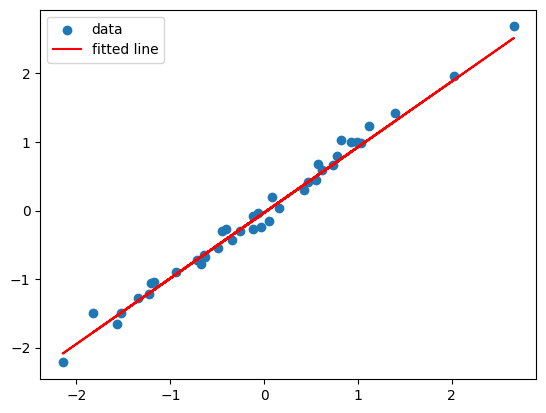

In [ ]:
# create and train the model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=50, n_features=1, noise=10)
df = pd.DataFrame(data=X, columns=['x'])
df['y'] = y
print(df.head())

scaler = StandardScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])
print('\n Dataframe after scaling')
print(df.head())

# decision threshold = .5
df['class'] = df['y'].apply(lambda x: 0 if x <= 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
predictions = model.predict(X_test)
print('\nx, y scatter plot with line of best fit as per our line equation')
print(f'y = {model.intercept_} + {model.coef_[0]}X')

plt.scatter(X_train['x'], y_train, label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
# plt.axhline(0.5, color='green', linestyle='dashed', label='threshold')
plt.legend();

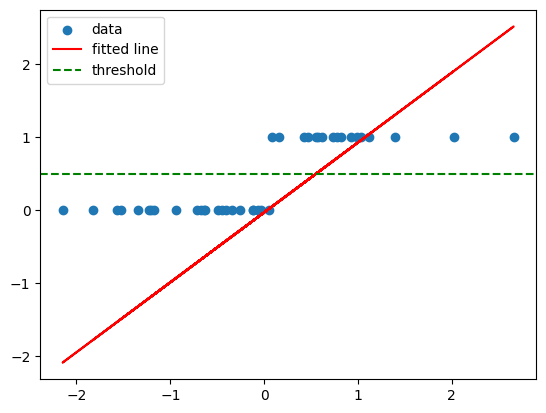

In [ ]:
# does a line of best fit over a binary dependent variable make sense?
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
# plt.axvline(0, color='gray', label='y=0')
plt.legend();

### The Sigmoid

Sigmoid curves are common in statistics as cumulative distribution functions (which go from 0 to 1), such as the integrals of the logistic density, the normal density, and Student's t probability density functions. The logistic sigmoid function is invertible, and its inverse is the logit function.

https://en.wikipedia.org/wiki/Sigmoid_function

Sigmoidal growth is a modification of exponential growth in which the percent change gets smaller as the population approaches the carrying capacity.

http://matcmath.org/textbooks/quantitativereasoning/sigmoidal-growth/

          x  class
0 -0.447899      0
1 -0.631631      0
2  0.466132      1
3  0.619959      1
4  2.022683      1

An S curve that is bound by 1 and 0


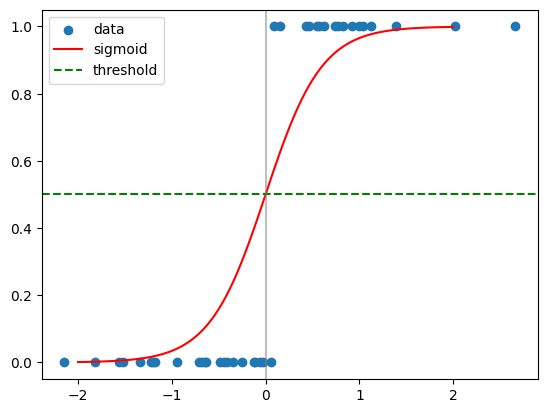

In [ ]:
# what we'd really like
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# df with x and class
print(df.drop('y', axis=1).head())

x = np.linspace(-2, 2, 100)
s = .3 # scale parameter
print('\nAn S curve that is bound by 1 and 0')
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))), color='red', label='sigmoid')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
plt.axvline(0, color='gray', alpha=0.5)
plt.legend()
plt.show()

### Probability

Probability = observed outcomes/possible outcomes
```
P(y=1 | β₀ + βᵢΧᵢ) = f(β₀ + βᵢΧᵢ)
```
The probability of y = 1 is determined by a threshold and in this equation, x is unbounded, $(-\infty, +\infty)$, on the x axis, but y is either 0 or 1, and not very informative in regards to x and our threshold. With binary classification we want to show a better relationship with x.

### What is this Thing Called Threshold?

Logistic regression returns a probability. You can use the returned probability "as is" (for example, the probability that the user will click on this ad is 0.00023) or convert the returned probability to a binary value (for example, this email is spam).

A logistic regression model that returns 0.9995 for a particular email message is predicting that it is very likely to be spam. Conversely, another email message with a prediction score of 0.0003 on that same logistic regression model is very likely not spam. However, what about an email message with a prediction score of 0.6? In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

https://developers.google.com/machine-learning/crash-course/classification/thresholding

**Review our line of best fit given x and y**


x, y scatter plot with line of best fit as per our line equation
y = 0.20 + 0.76X


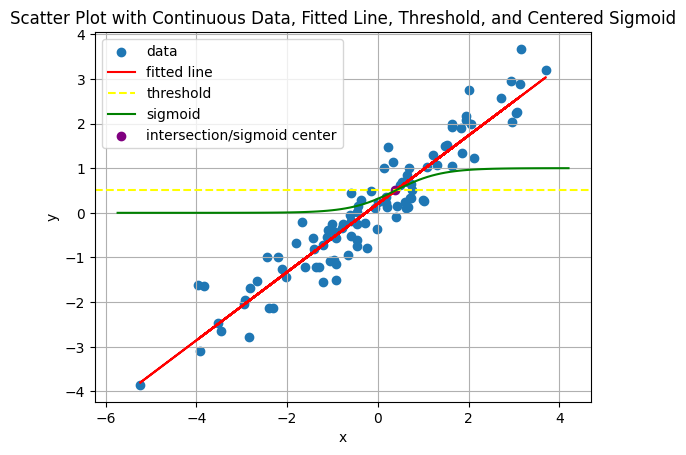

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data where y is continuous and follows the line of best fit with some noise
np.random.seed(42)
num_samples = 100
X_train = pd.DataFrame({'x': np.random.randn(num_samples) * 2})  # Wider range for x
true_slope = 0.8
true_intercept = 0.2
noise = np.random.randn(num_samples) * 0.5  # Adjust noise for desired scatter
y_train = true_intercept + true_slope * X_train['x'] + noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print('\nx, y scatter plot with line of best fit as per our line equation')
print(f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X')

plt.scatter(X_train['x'], y_train, label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.axhline(0.5, color='yellow', linestyle='dashed', label='threshold')

# Find the x-intercept of the fitted line and the threshold (y=0.5)
x_intercept = (0.5 - model.intercept_) / model.coef_[0] if model.coef_[0] != 0 else np.nan

# Define the sigmoid function
def sigmoid(x, center, slope):
    return 1 / (1 + np.exp(-slope * (x - center)))

# Generate x values for plotting the sigmoid
x_min = X_train['x'].min() - 0.5
x_max = X_train['x'].max() + 0.5
x_sigmoid = np.linspace(x_min, x_max, 100)

# Adjust the slope (s) for visual fit
s = 2  # Experiment with this value

# Plot the sigmoid centered at the intersection
if not np.isnan(x_intercept):
    plt.plot(x_sigmoid, sigmoid(x_sigmoid, x_intercept, s), color='green', label='sigmoid')
    plt.scatter(x_intercept, 0.5, color='purple', marker='o', label='intersection/sigmoid center')
else:
    plt.plot(x_sigmoid, [0.5] * len(x_sigmoid), color='green', linestyle='--', label='sigmoid (no intersection)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter Plot with Continuous Data, Fitted Line, Threshold, and Centered Sigmoid')
plt.grid(True)
plt.show()

### Odds

1.  **Model the probability (p) using the sigmoid function:**
    ```
    p = 1 / (1 + e^(-(β₀ + β₁X + ... + βₚXₚ)))
    ```

2.  **Calculate the odds:**
    ```
    Odds = p / (1 - p)
    ```
    Substituting the formula for p:
    ```
    Odds = [1 / (1 + e^(-(β₀ + β₁X)))] / [1 - 1 / (1 + e^(-(β₀ + β₁X)))]
    Odds = e^(β₀ + β₁X + ... + βₚXₚ)
    ```

3.  **Take the natural logarithm of the odds (the log-odds or logit):**
    ```
    ln(Odds) = ln(p / (1 - p)) = β₀ + β₁X + ... + βₚXₚ
    ```

**Therefore, the formula for the odds itself is simply:**

**Odds = p / (1 - p)**

The equation `p / (1 - p) = β₀ + β₁X` represents a model where the odds are directly linearly related to the predictor, which is not the standard formulation of logistic regression. The log-odds are what are modeled linearly.

Odds are positive so we have a range of 0, $+ \infty$ so we use log

In [ ]:
# https://www.statisticshowto.com/log-odds/
import pandas as pd
import math

print('Defining odds based on a probability represented by a decimals')
d = {'Probs': [.1, .2, .3, .4, .5, .6, .7, .8, .9]}
probs = pd.DataFrame(d)
probs['Odds'] = probs['Probs']/(1 - probs['Probs'])
probs.head(9)

Defining odds based on a probability represented by a decimals


,Probs,Odds
0,0.1,0.111111
1,0.2,0.250000
2,0.3,0.428571
3,0.4,0.666667
4,0.5,1.000000
5,0.6,1.500000
6,0.7,2.333333
7,0.8,4.000000
8,0.9,9.000000


### Log Odds

We use the log of odds so that we can get to $(-\infty, +\infty)$

$\large{log(\frac{p}{1 - p}}) = \beta_0 + \beta_i X_i$

Now our range is unrestricted $- \infty, + \infty$ where the odds for and odds against meet at 0 with potential symmetrical range 0 to infinity. See images at https://towardsdatascience.com/https-towardsdatascience-com-what-and-why-of-log-odds-64ba988bf704

In binomial logistic regression, the dependent variable takes only two values, which can be coded 0 and 1. So, it can't be that $Y=b0+b1X$ because that could result in any value. The logit transformation solves this problem.

We take the odds to make the value continuous. We take the odds ratio to get a parameter estimate and we take the log of that ratio to make the variable range from negative infinity to infinity and be symmetric around 0 instead of 1.

Peter Flom (https://stats.stackexchange.com/users/686/peter-flom), Why $\log(\frac{p}{1-p}) = b_0+b_1x $ in Logistic regression, URL (version: 2017-09-25): https://stats.stackexchange.com/q/304844

In [ ]:
# log odds example
import math

p = .2
odds = p/(1-p)
print('.2/.8 =', odds)
print('log(.25) =', math.log(odds))

.2/.8 = 0.25
log(.25) = -1.3862943611198906


In [ ]:
# add log odds to our probs dataframe
probs['Log Odds'] = probs['Odds'].apply(lambda x: math.log(x))
probs.head(9)

,Probs,Odds,Log Odds
0,0.1,0.111111,-2.197225
1,0.2,0.250000,-1.386294
2,0.3,0.428571,-0.847298
3,0.4,0.666667,-0.405465
4,0.5,1.000000,0.000000
5,0.6,1.500000,0.405465
6,0.7,2.333333,0.847298
7,0.8,4.000000,1.386294
8,0.9,9.000000,2.197225


## From Lines to Likelihood

**Linear regression** is a powerful tool for modeling the relationship between a continuous outcome variable and one or more predictor variables. We've explored how to find the best-fitting line (or hyperplane) to our data using the equation:

```
y = β₀ + β₁Χ₁ + β₂Χ₂ + ... + βᵢΧᵢ + ε
```

Here, `y` is our continuous outcome, `xᵢ` are our predictors, `βᵢ` are the coefficients that quantify the relationship, and `ε` represents the error term. A key characteristic of linear regression is that the predicted outcome `y` can take on any real number – positive, negative, or zero, extending to infinity in both directions.

**The Challenge of Binary Outcomes**

Now, let's consider a different type of outcome variable: one that is **binary**. This means the outcome can only take on one of two values, such as:

* Success or Failure
* Yes or No
* 0 or 1

Our goal is to model the **probability** of one of these outcomes occurring, say `P(y = 1)`.

**The Naive Linear Approach**

Let's begin by trying to make both sides of the following regression equation make sense:

```
P(y = 1) | β₀ + βᵢΧᵢ
```

**Probabilities must always be between 0 and 1 (inclusive)**. However, the output of the linear equation $β₀ + β_iX_i$, just like the `y` in standard linear regression, can take on any real number. This means our "predicted probability" could easily fall below 0 or rise above 1, which are not valid probability values.

**The Need for a Transformation: Introducing the Link Function**

This limitation highlights the need for a way to transform the unbounded output of our linear combination of predictors into a value that is always neatly confined within the 0 to 1 range. This is where the concept of a **link function** comes into play. In logistic regression, the link function we use involves the **odds** and the **logit**.

**Step 1: Understanding the Odds**

Before we get to the logit, let's first understand **odds**. The odds of an event occurring are defined as the ratio of the probability of the event occurring to the probability of it not occurring:

```
Odds = P(y = 1) / P(y = 0) = p / (1 - p)
```

The odds have a range from 0 (when the probability is 0) to infinity (as the probability approaches 1). While bounded below by zero, they are still unbounded above, making them not ideal for direct linear modeling.

**Step 2: The Logit Transformation**

To address the unbounded nature of the odds, we apply the **logit transformation**, which is the natural logarithm of the odds:

```
logit(p) = ln(p / (1 - p))
```

The beauty of the logit function is that it transforms the range of the odds ([0, ∞)) to the entire real number line (-∞, ∞). This unbounded range now perfectly aligns with the possible output of our linear combination of predictors.

**Step 3: Modeling the Logit Linearly**

The core assumption of logistic regression is that the **logit of the probability** is linearly related to the predictor variables:

```
ln(p / (1 - p)) = β₀ + βᵢΧᵢ
```

Here, we see the familiar linear combination of predictors on the right-hand side. We are essentially using a linear model to predict the *transformed* probability (the log-odds).

**Step 4: Deriving the Logistic Function**

Our ultimate goal is to model the probability `p` directly. To do this, we need to reverse the logit transformation. Let's follow the steps:

1.  **Exponentiate both sides:**
    ```
    e^[ln(p / (1 - p))] = e^(β₀ + βᵢΧᵢ)
    ```

2.  **Simplify the left side:**
    ```
    p / (1 - p) = e^(β₀ + βᵢΧᵢ)
    ```

3.  **Solve for p:**
    ```
    p = (1 - p) * e^(β₀ + βᵢΧᵢ)
    p = 1 * e^(β₀ + βᵢΧᵢ) - p * e^(β₀ + βᵢΧᵢ)
    p + p * e^(β₀ + βᵢΧᵢ) = e^(β₀ + βᵢΧᵢ)
    p * (1 + e^(β₀ + βᵢΧᵢ)) = e^(β₀ + βᵢΧᵢ)
    p = e^(β₀ + βᵢΧᵢ) / (1 + e^(β₀ + βᵢΧᵢ))
    ```
    or

    ```
    Let x = β₀ + βᵢΧᵢ

    p = (1 - p) * e^x
    p = e^x - p * e^x
    p + p * e^x = e^x
    p * (1 + e^x) = e^x
    p = e^x / (1 + e^x)
    ```

4.  **Divide numerator and denominator by `e^(β₀ + βᵢΧᵢ)`:**
    ```
    p = [e^(β₀ + βᵢΧᵢ) / e^(β₀ + βᵢΧᵢ)] / [(1 / e^(β₀ + βᵢΧᵢ)) + (e^(β₀ + βᵢΧᵢ) / e^(β₀ + βᵢΧᵢ))]
    ```
    or
    ```
    p = [e^x / e^x] / [(1 / e^x) + (e^x / e^x)]
    ```

5.  **Simplify to the Logistic Function:**
    ```
    p = 1 / (e^(-(β₀ + βᵢΧᵢ)) + 1)
    ```
    or
    ```
    p = 1 / (e^(-(x)) + 1)
    ```

    Which is commonly written as:

    ```
    p = 1 / (1 + e^(-(β₀ + βᵢΧᵢ)))
    ```
    or
    ```
    p = 1 / (1 + e^(-x))
    ```

This final equation is the **logistic function**. Notice how it takes the linear combination of predictors (`β₀ + βᵢΧᵢ`) and transforms it through an exponential and a final division to produce a value of `p` that is always guaranteed to be between 0 and 1.

$p = \large{\frac{1}{1 + e^{-x}}}$

**Conclusion**

Logistic regression, while used for binary outcomes, still retains the fundamental concept of a linear relationship between the predictors and a transformed version of the outcome (the log-odds). The logistic function acts as a crucial link, ensuring that our predicted probabilities are meaningful and within the valid range. By understanding this derivation, we can appreciate how logistic regression bridges the gap between linear modeling and the world of binary outcomes.

## Make Classification Example with 2 Features

In [ ]:
# Create dataset
import pandas as pd
from sklearn.datasets import make_classification

n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features

# unpack X and y
features, binary_class = make_classification(n_samples=n, n_features=f,
                                             n_informative=inform, n_redundant=0,
                                             n_clusters_per_class=1, random_state=42)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Class'] = binary_class
df.head()

,Feature_1,Feature_2,Class
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


### Logistic Model

In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination).

* $p = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_ix_i)}}}$

* https://en.wikipedia.org/wiki/Logistic_regression
* https://en.m.wikipedia.org/wiki/Logistic_function

In [ ]:
# get our parameters
from statsmodels.formula.api import logit

model = logit(formula='Class ~ Feature_1 + Feature_2', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.242088
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.6507
Time:                        20:43:05   Log-Likelihood:                -242.09
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.283e-196
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1197      0.365      3.070      0.002       0.405       1.834
Feature_1     -0.4561      0.171     -2.673      0.008      -0.790      -0.122
Feature_2      3.4780      0.237     14.649      0.000       3.013       3.943
==============================================================================
"""

In [ ]:
import numpy as np
import math

print(model.params)
def logistic_function(row):
    b0 = model.params.Intercept
    b1 = model.params.Feature_1
    b2 = model.params.Feature_2

    x1 = row['Feature_1']
    x2 = row['Feature_2']

    return 1 / (1 + np.exp(-(b0+(b1*x1)+(b2*x2))))

df['p'] = df.apply(logistic_function, axis=1)
df['Predicted'] =  df['p'].apply(lambda x: 0 if x < .5 else 1)
df['Odds'] = df['p']/(1 - df['p'])
df['Log Odds'] = df['Odds'].apply(lambda x: math.log(x))
df.head()

Intercept    1.119669
Feature_1   -0.456101
Feature_2    3.478029
dtype: float64


,Feature_1,Feature_2,Class,p,Predicted,Odds,Log Odds
0,0.601034,1.535353,1,0.997945,1,485.673902,6.185537
1,0.755945,-1.172352,0,0.035482,0,0.036788,-3.302593
2,1.354479,-0.948528,0,0.057480,0,0.060985,-2.797120
3,3.103090,0.233485,0,0.626309,1,1.676007,0.516414
4,0.753178,0.787514,1,0.971116,1,33.620678,3.515141


### Logit Function

A Logit function, the inverse of the logistic sigmoid, also known as the log-odds function, is a function that represents probability values from 0 to 1, and negative infinity to infinity.

* https://deepai.org/machine-learning-glossary-and-terms/logit
* https://en.m.wikipedia.org/wiki/Logit

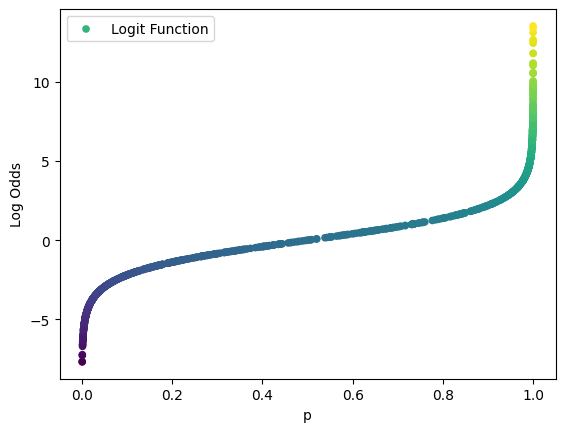

In [ ]:
# logit function - log odds over p
import matplotlib.pyplot as plt

df.plot.scatter(x='p', y='Log Odds', label='Logit Function', c=df['Log Odds'])
plt.show()

### Logit vs Sigmoid

The inverse of the logit curve is the inverse-logit or sigmoid function. The sigmoid function transforms the numbers ( -∞ to +∞ ) back to values between 0 and 1.

* https://ajaytech.co/python-logistic-regression/

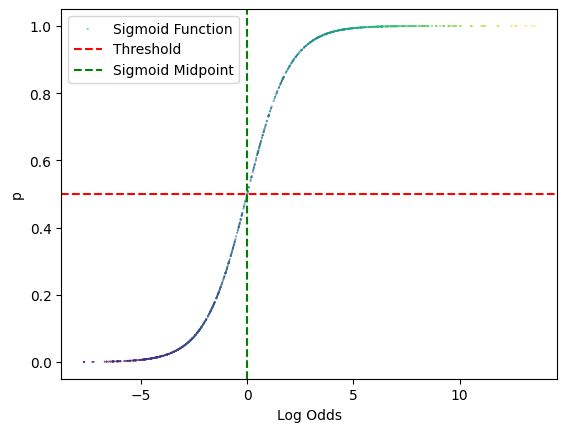

In [ ]:
import matplotlib.pyplot as plt

df.plot.scatter(x='Log Odds', y='p', marker='.', s=.5, label='Sigmoid Function', c=df['Log Odds'])
plt.axhline(y=.5, color='red', linestyle='dashed', label='Threshold')
plt.axvline(x=0, color='green', linestyle='dashed', label='Sigmoid Midpoint')
plt.legend()
plt.show()

* Logistic regression algorithm: $f(x) = \large{\frac{1}{1 + e^{-x}}}$
* x = $\beta_0 + \beta_1X_1 + \beta_2X_2$
* If $x > 0$ then $\frac{1}{1 + e^{-x}} > .5$
* If $x < 0$ then $\frac{1}{1 + e^{-x}} < .5$

## The Confusion Matrix

Suppose we have some tabular data and each observation is labeled either a 0 or 1. Our goal is to create a model and predict whether new data will be labelled a 0 or a 1.

**True Positive (TP)**: An outcome that is labeled 1 and in reality is a 1

**False Positive (FP)**: An outcome that labeled 1 and in reality is a 0

**True Negative (TN)**: An outcome that is labeled 0 and in reality is a 0

**False Negative (FN)**: An outcome that is labeled 0 and in reality is a 1

**Accuracy**: (TP + TN) / (TP + FP + TN + FN)

**Precision**: TP / (TP + FP), a measure of quality

**Recall**: TP / (TP + FN), a measure of quantity

### Type I and Type II Errors

https://towardsdatascience.com/statistics-for-data-scientists-f2456d26c5a5

Type I Error means rejecting the True null hypothesis and accepting the alternate hypothesis. It is a false positive. A smoke detector detecting smoke when there is no smoke.
Type II Error means accepting the null hypothesis when an alternate hypothesis is true. It is a false negative. When fire alarm fails to detect fire.

### Alpha and Beta Level

Alpha level is also known as the significance level, α. It is the probability of making the wrong decision,i.e., rejecting the null hypothesis when it is true. Low alpha levels mean that we need strong evidence to be able to reject the null hypothesis. This means that alpha level of 1% requires more statistical evidence than 5%.

Why is 0.05 (5%) used as significance level so commonly?

The smaller the alpha level, the little is the chance to reject True Null hypothesis. And, also the smaller is the chance to reject the False null hypothesis, because of the tiny area. The more you try to avoid Type I Error, the more you are likely to make a Type II Error.

A confidence level is 1 - α, which means accepting the null hypothesis when it is True.
Beta level means the probability of making a Type II Error, i.e., rejecting the Alternate hypothesis when it is True.

### Confustion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix)... It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table). They provide our True Negatives, False Positives, False Negatives, and True Positives, from which we derive Accuracy, Precision, and Recall.

https://en.wikipedia.org/wiki/Confusion_matrix

**Note**: Because of the of the output sklearn provides, we will structure our table different from what Wikipedia says.

Confused? Please be aware of the distinction. In this course we will be using the sklearn matrix. There is a way to change the rows and columns to match Wikipedia's matrix by adding labels: confusion_matrix(y_test, predictions, labels=\[1, 0\]).

In [ ]:
# Create dataset
n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features
features, binary_class = make_classification(n_samples=n, n_features=f,
                                             n_informative=inform, n_redundant=0,
                                             n_clusters_per_class=1, random_state=13)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Target'] = binary_class
df.head()

,Feature_1,Feature_2,Target
0,-1.355723,0.932216,0
1,-1.448966,0.628289,0
2,-0.259349,-0.792658,0
3,0.815272,-0.205096,1
4,1.430197,1.342170,1


In [ ]:
# X_train, X_test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

**The Solver (liblinear)**: Solvers are used to minimize the loss function which in turn provides our best coefficients. Please see the documentation to learn about the five different solvers.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
# View confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
print('Here is what the numbers represent from the sklLearn output')
print('''
                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP
''')
print()
print('Here is what the numbers represent from the Wikipedia article')
print('''
                 actual
                   |  1  |  0
           --------------------
           class 1 | TP  |  FP
predicted  --------------------
           class 0 | FN  |  TN
''')

Confusion Matrix
[[90 10]
 [ 9 91]]

Here is what the numbers represent from the sklLearn output

                 predicted
                   |  0  |  1
           --------------------
           class 0 | TN  |  FP
  actual   --------------------
           class 1 | FN  |  TP


Here is what the numbers represent from the Wikipedia article

                 actual
                   |  1  |  0
           --------------------
           class 1 | TP  |  FP
predicted  --------------------
           class 0 | FN  |  TN



In [ ]:
# Compare with crosstab
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,90,10,100
1,9,91,100
All,99,101,200


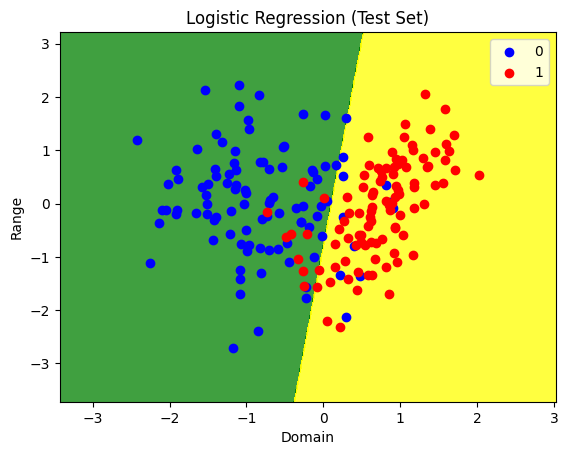

In [ ]:
# review our plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('blue', 'red'))(i), label = j)

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Domain')
plt.ylabel('Range')
plt.legend()
plt.show()

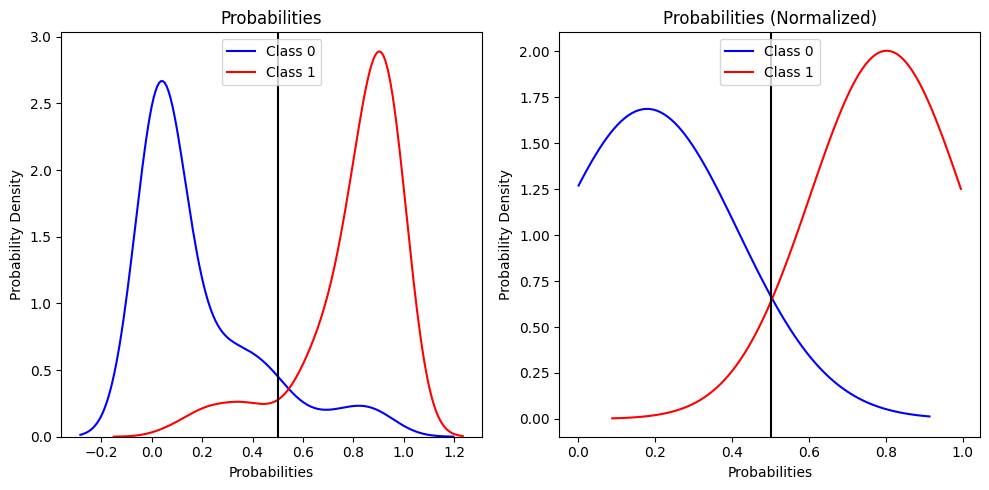

In [ ]:
# Compare KDE plots for probabilities and normed probabilities
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

probs=model.predict_proba(X_test)[:,1]
sns.kdeplot(probs[y_test==0], shade=False, color='blue', label='Class 0', ax=ax1);
sns.kdeplot(probs[y_test==1], shade=False, color='red', label='Class 1', ax=ax1);
ax1.axvline(x=.5, color='black')
ax1.set_title('Probabilities')
ax1.set(xlabel='Probabilities', ylabel='Probability Density')

mean = probs[y_test==0].mean()
std = probs[y_test==0].std()
x = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y = scipy.stats.norm.pdf(x,mean,std)
ax2.plot(x, y, color='blue', label='Class 0')

mean = probs[y_test==1].mean()
std = probs[y_test==1].std()
x = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y = scipy.stats.norm.pdf(x,mean,std)
ax2.plot(x, y, color='red', label='Class 1')

x_threshold = 0.5
ax2.axvline(x=x_threshold,color='black')

ax2.set_title('Probabilities (Normalized)')
ax2.set(xlabel='Probabilities', ylabel='Probability Density')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')
plt.tight_layout()
plt.show()

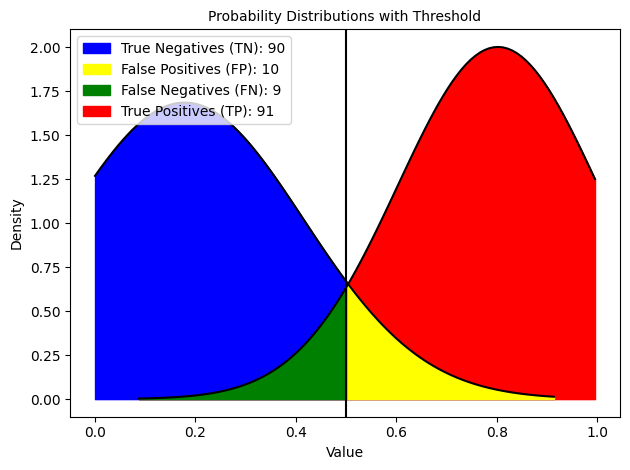

In [ ]:
# visualize TN, FN, FP, TP
import math
import matplotlib.patches as mpatches

x_threshold = 0.5
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

mean_0 = probs[y_test==0].mean()
std_0 = probs[y_test==0].std()
x_0 = np.linspace(probs[y_test==0].min(), probs[y_test==0].max(), 100)
y_0 = scipy.stats.norm.pdf(x_0,mean_0,std_0)

mean_1 = probs[y_test==1].mean()
std_1 = probs[y_test==1].std()
x_1 = np.linspace(probs[y_test==1].min(), probs[y_test==1].max(), 100)
y_1 = scipy.stats.norm.pdf(x_1,mean_1,std_1)

plt.plot(x_0, y_0, color='black')
plt.fill_between(x_0, y_0, color='blue', alpha=1)

plt.plot(x,y, color='black')
plt.fill_between(x_1, y_1, color='red', alpha=1)

ptx_0 = np.linspace(x_threshold, probs[y_test==0].max(), 100)
pty_0 = scipy.stats.norm.pdf(ptx_0,mean_0,std_0)
plt.fill_between(ptx_0, pty_0, color='yellow', alpha=1)

ptx_1 = np.linspace(probs[y_test==1].min(), x_threshold, 100)
pty_1 = scipy.stats.norm.pdf(ptx_1,mean_1,std_1)
plt.fill_between(ptx_1, pty_1, color='green', alpha=1)

tn_patch = mpatches.Patch(color='blue', label='True Negatives (TN): ' + str(tn))
fp_patch = mpatches.Patch(color='yellow', label='False Positives (FP): ' + str(fp))
fn_patch = mpatches.Patch(color='green', label='False Negatives (FN): ' + str(fn))
tp_patch = mpatches.Patch(color='red', label='True Positives (TP): ' + str(tp))
plt.legend(handles=[tn_patch,fp_patch,fn_patch,tp_patch], loc=2)

plt.title('Probability Distributions with Threshold',fontsize=10)
plt.axvline(x=x_threshold,color='black')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()

This plot directly illustrates the components of a confusion matrix in the context of classification, but we can draw parallels to the historical debate between Neyman-Pearson and Fisher regarding hypothesis testing.

**The Core of the Neyman-Pearson vs. Fisher Debate (Simplified for the Connection):**

* **Fisher's Approach:** Primarily focused on obtaining a p-value to assess the evidence against a single null hypothesis. The emphasis was on the strength of evidence provided by the data.
* **Neyman-Pearson Approach:** Introduced the framework of decision-making between two specific hypotheses (null and alternative) and emphasized the control of error rates in repeated experiments. Key concepts included:
    * **Type I Error (False Positive - α):** Rejecting a true null hypothesis.
    * **Type II Error (False Negative - β):** Failing to reject a false null hypothesis.
    * **Power (1 - β):** The probability of correctly rejecting a false null hypothesis.
    * **Setting a Significance Level (α):** Pre-determining the acceptable probability of a Type I error.

**Connecting the Plot to the Debate:**

1.  **Framing Classification as a Decision:** You can frame the classification task as a decision-making process similar to hypothesis testing:
    * **Null Hypothesis (H₀):** The instance belongs to the negative class.
    * **Alternative Hypothesis (H₁):** The instance belongs to the positive class.
    * **Decision Rule:** The classification threshold acts as the decision rule. If the predicted probability (or score) is above the threshold, we "reject the null" and classify as positive.

2.  **Mapping Confusion Matrix to Error Types:** Now, directly connect the components of the confusion matrix to the error types in the Neyman-Pearson framework:
    * **False Positives (FP):** These are analogous to **Type I errors (α)**. We incorrectly classify a negative instance as positive, which means we "rejected the true null hypothesis." The yellow area in the plot represents the probability or proportion of Type I errors for the chosen threshold.
    * **False Negatives (FN):** These are analogous to **Type II errors (β)**. We incorrectly classify a positive instance as negative, which means we "failed to reject a false null hypothesis." The green area in the plot represents the probability or proportion of Type II errors for the chosen threshold.
    * **True Positives (TP):** These relate to **Power (1 - β)**. We correctly classify a positive instance as positive, meaning we correctly rejected the false null hypothesis. The red area represents the probability or proportion of correct positive classifications.
    * **True Negatives (TN):** These represent correctly failing to reject a true null hypothesis.

3.  **The Role of the Threshold (α and β Control):** Emphasize how the choice of the classification threshold directly influences the balance between False Positives (Type I errors) and False Negatives (Type II errors).
    * **Lowering the threshold (moving it to the left):** Increases the number of positive predictions, leading to more True Positives but also more False Positives (higher α). It decreases False Negatives (lower β, higher power).
    * **Raising the threshold (moving it to the right):** Decreases the number of positive predictions, leading to more True Negatives but also more False Negatives (higher β, lower power). It decreases False Positives (lower α).

4.  **Connecting to Fisher's Perspective (Less Direct):** You can briefly mention that Fisher's emphasis on the p-value could be seen as providing a measure of evidence against the null hypothesis for a single instance. However, the Neyman-Pearson framework, as illustrated by the control of error rates (α and β) across many decisions (or classifications), provides a more direct link to the concepts visualized in the confusion matrix and the trade-offs involved in setting a decision threshold.

**Example Analogy:**

"Think of classifying emails as spam (positive) or not spam (negative).

* A **False Positive** (yellow area) is like classifying a legitimate email as spam (Type I error - rejecting a true 'not spam' hypothesis).
* A **False Negative** (green area) is like classifying a spam email as legitimate (Type II error - failing to reject a false 'not spam' hypothesis).

Just like in the Neyman-Pearson framework where we set a significance level (α) to control the rate of Type I errors, in classification, we might adjust our threshold to minimize False Positives if the cost of missing a legitimate email is high."

**Key Takeaway for Your Students:**

By drawing this analogy, you can show your students that the fundamental considerations of error types and decision thresholds are not unique to formal hypothesis testing but are also central to the practical task of classification. The plot provides a visual and intuitive way to understand these trade-offs in action.

While the plot isn't a direct visualization of the p-value concept from Fisher's approach, it beautifully illustrates the core ideas of decision rules and error control that were central to the Neyman-Pearson framework and are fundamental to understanding the performance of classification models.

In [ ]:
# Compare with crosstab
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,90,10,100
1,9,91,100
All,99,101,200


Okay, "sort of" is right, but we can definitely work with this representation of the confusion matrix! It's laid out in a way that we can extract the key values. Let's reconstruct the standard confusion matrix format from what you've provided:

|                | Predicted: 0 (Negative) | Predicted: 1 (Positive) | Total Actual |
|----------------|-------------------------|-------------------------|--------------|
| **Actual: 0 (Negative)** | 90 (TN)                 | 10 (FP)                 | 100          |
| **Actual: 1 (Positive)** | 9 (FN)                  | 91 (TP)                 | 100          |
| **Total Predicted**| 99                      | 101                     | 200          |

**Breaking down the values based on your definitions:**

* **True Negatives (TN):** 90 (Predicted 0, Actual 0)
* **False Positives (FP):** 10 (Predicted 1, Actual 0)
* **False Negatives (FN):** 9 (Predicted 0, Actual 1)
* **True Positives (TP):** 91 (Predicted 1, Actual 1)

**Now we can revisit your question about the 95% and alpha:**

* **Total predicted as positive (to the right of the threshold in the plot):** TP + FP = 91 + 10 = 101
* **False Positives (yellow area):** FP = 10

The proportion of predictions that were positive and were actually negative (False Positives) out of all positive predictions is:

FP / (TP + FP) = 10 / 101 ≈ 0.099 or **9.9%**

So, your visual estimation was correct – it's nowhere near 95%.

**Connecting to the Null Hypothesis and 1 - Alpha:**

Let's assume the null hypothesis (H₀) is that an instance belongs to the negative class (Actual = 0).

* **Alpha (α) - Probability of a Type I Error (False Positive Rate):** This is the probability of rejecting H₀ when it's true. In our case, it's the probability of predicting positive (1) when the actual class is negative (0). We can estimate this from the confusion matrix as:

    `FPR = FP / (TN + FP) = 10 / (90 + 10) = 10 / 100 = 0.10` or **10%**

    So, for the chosen threshold, the estimated probability of a Type I error (α) is 10%.

* **1 - Alpha (Confidence Level or True Negative Rate - Specificity):** This is the probability of *not* rejecting H₀ when it's true, i.e., correctly predicting negative when the actual class is negative.

    `TNR = TN / (TN + FP) = 90 / (90 + 10) = 90 / 100 = 0.90` or **90%**

    So, the estimated value of 1 - alpha (or the specificity) is 90%.

**Therefore, based on the provided (sort of) confusion matrix:**

* The proportion of positive predictions that were actually negative (related to the yellow area) is about 9.9%.
* The estimated probability of a Type I error (α) is 10%.
* The estimated value of 1 - alpha (Specificity or True Negative Rate) is 90%.

The visual impression from the plot aligns with these calculations – the False Positive area (yellow) appears smaller than the True Positive area (red) on the positive prediction side of the threshold.

### Word Problem

Absolutely! Here's a word problem that uses the numbers from your confusion matrix to illustrate the classic "positive test result" scenario and the importance of considering base rates (prevalence):

**The Disease Screening Problem**

Imagine a new rapid test is developed to detect a rare disease affecting the population of Denton, Texas. A large-scale study of 200 individuals (our 'Total' from the confusion matrix) was conducted, and the results compared against the actual presence or absence of the disease. Here's what was found:

* **Actual Disease Status: No (Actual 0)** - Out of 100 people who did *not* have the disease, the test correctly identified 90 as negative (True Negatives), but incorrectly identified 10 as positive (False Positives).

* **Actual Disease Status: Yes (Actual 1)** - Out of 100 people who *did* have the disease, the test correctly identified 91 as positive (True Positives), but incorrectly identified 9 as negative (False Negatives).

Now, suppose you go to a clinic in Denton and take this test, and your result comes back **positive**. What is the actual probability that you have the disease?

**Solving the Word Problem:**

To find the probability of actually having the disease given a positive test result, we need to use the concept of **Positive Predictive Value (PPV)**. The PPV tells us the proportion of people who test positive who actually have the disease.

From our (sort of) confusion matrix:

* **Number of people who tested positive (Predicted 1):** 10 (FP) + 91 (TP) = 101
* **Number of people who actually had the disease and tested positive (True Positives):** 91

The Positive Predictive Value (PPV) is calculated as:

```
PPV = True Positives (TP) / (True Positives (TP) + False Positives (FP))
PPV = 91 / (91 + 10)
PPV = 91 / 101
PPV ≈ 0.901 or 90.1%
```

**Answer to the Word Problem:**

Despite testing positive for the disease, your actual probability of having the disease is approximately **90.1%**.

**Connecting to Prevalence (Base Rate):**

It's important to note that in this example, the prevalence of the disease in the studied group was 100 out of 200, or 50%. The PPV is influenced by the prevalence of the disease in the population. If the disease were much rarer in Denton, even with the same test accuracy, the PPV of a positive result would be lower.

**Discussion Points:**

* **Think carefully about a positive result:** Just because the test says "yes, you might have the disease," it doesn't mean it's a definite "yes." Our example showed that even with a positive test, there was still a chance you *didn't* actually have the disease (that's where those False Positives come in).

* **False positives matter:** Remember those False Positives? Those were people who didn't have the disease but still tested positive. These incorrect positive results actually lower your chances of truly having the disease *even when your test is positive*. It's like having some misleading clues in an investigation – they can point you in the wrong direction.

* **How common the disease is matters a lot (Prevalence):** Imagine if the disease we were testing for was very rare in Denton, affecting only a few people out of every thousand. Even if our test is pretty good at finding the disease when it's there, if it gives even a few False Positives, the number of people who test positive but *don't* have the disease could be much higher than the number who test positive and *do* have it. So, how common the disease is in the first place (its prevalence) really changes how likely it is you actually have it after a positive test. Rare diseases often have a lower chance of being real even after a positive test.

* **What about a negative test?** You can also think about what a negative test result means. What's the probability that you *don't* have the disease if the test says you're negative? That's a concept called the **Negative Predictive Value (NPV)**, and it works in a similar way by considering the True Negatives and False Negatives.

Essentially, a test result is just one piece of the puzzle. To really understand the chances of having or not having a disease, we need to consider how accurate the test is *and* how common the disease is in the population.

Okay class, let's revisit the idea of the **base rate**, which is super important when we're interpreting test results or even thinking about probabilities in everyday situations.

**What is the Base Rate?**

The base rate is simply **how common something is in the general population** before we have any specific information or test results. It's the underlying probability of an event occurring. Think of it as the starting point or the prior probability.

**The OJ Simpson Trial and Base Rates (A Simplified Explanation):**

Yes, the defense in the OJ Simpson trial reportedly used an argument related to base rates. Here's a way to understand it:

* **Defense Argument (Simplified):** The defense argued that the base rate of husbands who divorce their wives and then go on to murder them is very low. They suggested that just because OJ Simpson had a history of domestic issues with Nicole Brown Simpson and they had divorced, it didn't automatically mean he was likely to commit murder. They focused on the rarity of that sequence of events.

* **Prosecution's (Alleged) Counter-Argument Weakness:** The prosecution, according to this account, didn't effectively counter this by providing the base rate of spouses (regardless of divorce history) being murdered by their current or former partners in situations involving a history of violence.

**Why Base Rates Matter (Using a Different Example First):**

Imagine a very rare disease that affects only 1 in 10,000 people in Denton. A new test for this disease is developed that is 99% accurate. If you take this test and it comes back positive, what's the probability you actually have the disease?

Many people instinctively think it's very high (around 99%). But let's look at the numbers:

* **Prevalence (Base Rate):** 1 out of 10,000 people have the disease (0.01%).
* **Population (for example):** 10,000 people tested.
* **True Positives (Test correctly identifies the sick person):** 1 (99% of 1 is about 1).
* **False Positives (Test incorrectly identifies a healthy person as sick):** Out of the 9,999 healthy people, 1% will test positive (0.01 * 9999 ≈ 100).

So, you have about 100 people testing positive who are healthy for every 1 person who tests positive and is actually sick. In this case, even with a very accurate test, the probability of actually having the disease after a positive result is quite low because the base rate of the disease is so rare.

**Connecting Back to the OJ Simpson Case:**

The defense was essentially arguing that the "base rate" of a divorced man with a history of domestic issues going on to commit murder was low. They wanted the jury to consider the rarity of that specific sequence of events.

The prosecution, to counter this effectively using base rates, might have needed to argue:

* What is the base rate of spouses (in general, or with a history of violence) being killed by their partners? This base rate might be higher than the very specific scenario the defense presented.
* What is the increased risk of spousal homicide in situations involving a history of domestic violence, regardless of divorce?

**In essence, the base rate provides crucial context.** Without knowing how common an event is in the first place, it's easy to misinterpret the significance of specific factors or pieces of evidence. The defense tried to leverage a seemingly low base rate for a very specific scenario, while the prosecution needed to ensure the jury considered the more relevant and potentially higher base rate of spousal homicide in contexts involving violence.

So, yes, the OJ Simpson case highlights the importance of considering the base rate when evaluating probabilities and evidence. Focusing on a very narrow and rare sequence of events (divorce followed by murder by the ex-spouse) might be misleading if the broader context (spousal violence leading to homicide) has a different underlying probability.

### Underfitting and Overfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.

<img src='https://docs.aws.amazon.com/images/machine-learning/latest/dg/images/mlconcepts_image5.png' alt='underfitting overfitting' />

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

If you're overfitting, or you are getting great training scores and poor  test scores, you might be overfitting so try removing the lesser performing features. The model is just memorizing the training data.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing.[2] Under-fitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

If you're underfitting, or you are getting poor training scores and test scores, you might be underfitting so try adding more data or more features.

https://en.wikipedia.org/wiki/Overfitting

### Bias Variance Tradeoff

In statistics and machine learning, the bias–variance tradeoff is the property of a model that the variance of the parameter estimates across samples can be reduced by increasing the bias in the estimated parameters. The bias–variance dilemma or bias–variance problem is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

Please become familiar with this image:

<img src='https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg' alt='bias variance tradeoff' />

Please read the article responsible for the image:

https://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html

#### A Formula

$E[(\hat{y} - y)^2] = E[(\hat{y} - E[\hat{y})^2] + (E[\hat{y}] - y)^2$
<br />MSE = Variance + Bias^2
* where y = given y, (ground truth)
* $\hat{y}$ = prediction
* $E[\hat{y}]$ = expected value or average of predictions
* error = $\frac{fp + fn}{total}$
* Bias = error in training
* Variance = range of predictions, how much an estimate of the target function will change if different data was is

<table width='50%' style='margin-right: 100%'>
    <tr>
        <td>Training Error</td>
        <td>1%</td>
        <td>15%</td>
        <td>16%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td>Testing Error</td>
        <td>15%</td>
        <td>16%</td>
        <td>33%</td>
        <td>1%</td>
    </tr>
    <tr>
        <td></td>
        <td>lo bias</td>
        <td>hi bias</td>
        <td>hi bias</td>
        <td>lo bias</td>
    </tr>
    <tr>
        <td></td>
        <td>hi var</td>
        <td>lo var</td>
        <td>hi var</td>
        <td>lo var</td>
    </tr>
</table>

https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/

### The Classification Report for Imbalanced Data Sets

Both the titanic and cancer datasets weren't as balanced as they could be but to appreciate the implications of an imbalanced dataset, consider a fraudualent credit card dataset where there may be a 1 (for fraudulent activity) per 1000 0s of normal activity. We wouldn't need to build a predictive model to make correct predictions 99% of the time. The data itself lets us do that. We need metrics that tell us that the model we build is learning about the relevant data and that it predicts what it is suppose to predict. This gets back to our Precision Recall Tradeoff.

**Precision**: The sum of observations correctly classified as positive out of the total observations classified as positive. From the formula, tp / (tp + fp), we can see we want to mimimize fp (false positives), or type I errors, which is sounding an alarm when there is no fire.

**Recall**: The sum of observations correctly classified as positive out of the total actual positives. From the forumula, tp / (tp + fn), we can see we want to minimize fn (false negatives), or type II errors, which is not sounding an alarm when there is a fire.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[90 10]
 [ 9 91]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       100
           1       0.90      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



* precision 0: 114 / 137
* precision 1: 66 / 86
* recall 0: 114 / 134
* recall 1: 66 / 89

We know about accuracy, precision, and recall and we've talked about f1-score as being the harmonic mean of precision and recall (f1 score = 2 * (precision * recall) / (precision + recall)).

* support: the number of observations labeled 0 or 1 (remember the pie chart we made of the target?)
* macro avg: the average between the two classes (e.g. (prec 0 + prec 1) / 2
* weighted avg: the average between the two classes taking into account the number of their observations (e.g. ((prec0 * score0) + (prec 1 * score1)) / total)

A classification report provides a little more information by providing metrics for each class. For example, for class 0, our recall is higher than our precision, which tells us that there are fewer false negatives than false positives in class 0.

In [ ]:
import numpy as np

print((.83 + .77) / 2)
wgt_exmpl = ((.83 * 134) + (.77 * 89)) / (134 + 89)
print(np.round(wgt_exmpl, 2))

0.8
0.81


### Precision Recall Tradeoff

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance... Accuracy can be a misleading metric for imbalanced data sets. Consider a sample with 95 negative and 5 positive values. Classifying all values as negative in this case gives 0.95 accuracy score.

https://en.wikipedia.org/wiki/Precision_and_recall

In cases of imbalanced data, precision, recall, and f1 score become useful metrics. Precision tells us the proportion of data that was predicted was actually predicted correctly. Recall, also known as the True Positive Rate, is the probability that an actual positive will be predicted to be positive.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

https://en.wikipedia.org/wiki/Precision_and_recall

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*GM10sFuFBAbhwBt2scuP1g.png' alt='precision recall tradeoff' />

https://datascience-george.medium.com/the-precision-recall-trade-off-aa295faba140

The following is a visualization of our true negatives, false positives, false negatives, and true positives from the data set generated with make_classification.

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix')
print()
print(f'''
           survived predicted
                   |  0   |  1
           -----------------------  -----------------------------------------
           no      | {tn}  |  {fp}     fpr (type I error)  | tnr
  actual   -----------------------  -----------------------------------------
           yes     | {fn}   |  {tp}     tpr (recall)        | fnr (type II error)

                    for   | precision
           ----------------------------
                    npv   | fdr

''')

Confusion Matrix


           survived predicted
                   |  0   |  1
           -----------------------  -----------------------------------------
           no      | 90  |  10     fpr (type I error)  | tnr
  actual   -----------------------  -----------------------------------------
           yes     | 9   |  91     tpr (recall)        | fnr (type II error)

                    for   | precision
           ----------------------------
                    npv   | fdr




### Metrics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1
* acc(uracy) = $\frac{tn + tp}{total}$
* error = $\frac{fp + fn}{total}$
* prev(alence) = $\frac{fn + tp}{total}$
* queue = $\frac{fp + tp}{total}$
* tpr = $\frac{tp}{tp + fn}$
    * true positive rate
    * recall
    * sensitivity
    * prob of detection
    * 1 - fnr
* fnr = $\frac{fn}{tp + fn}$
    * false negative rate
    * type II error
    * 1 - tpr
* tnr = $\frac{tn}{tn + fp}$
    * true negative rate
    * specificity
    * 1 - fpr
* fpr = $\frac{fp}{tn + fp}$
    * false positive rate
    * type I error
    * fall out
    * prob of false claim
    * 1 - tnr
* ppv = $\frac{tp}{tp + fp}$
    * positive predicted value
    * precision
    * 1 - fdr
* fdr = $\frac{fp}{tp + fp}$
    * false discovery rate
    * 1 - ppv
* npv = $\frac{tn}{tn + fn}$
    * negative predicted value
    * 1 - for
* for = $\frac{fn}{tn + fn}$
    * false omission rate
    * 1 - npv
* liklihood ratio+ (lr+) = $\frac{tpr}{fpr}$
    * roc
* liklihood ratio- (lr-) = $\frac{fnr}{tnr}$
* diagnostic odds ratio = $\frac{lr+}{lr-}$
* f1 score = 2 * $\frac{precision-recall}{precision+recall}$
* Youden's J = sensitivity + specificity - 1 = tpr - fpr
* Matthew's Correlation Coefficient = $\frac{(tp*tn)-(fp*tp)}{\sqrt{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}}$
  

## Model Comparisons

In [ ]:
# get data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

comparisons = pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/K-Nearest-Neighbors-Social-Network-Ads/master/Social_Network_Ads.csv')
print(comparisons.shape)
print(comparisons.head())
print(comparisons.info())

(400, 5)
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


In [ ]:
# get X and y and train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comparisons.drop(['User ID', 'Gender', 'Purchased'], axis=1),
                                                    comparisons.Purchased,
                                                    test_size=0.2, random_state=42)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

### Logistic Regression

[[50  2]
 [ 9 19]]
0.8625


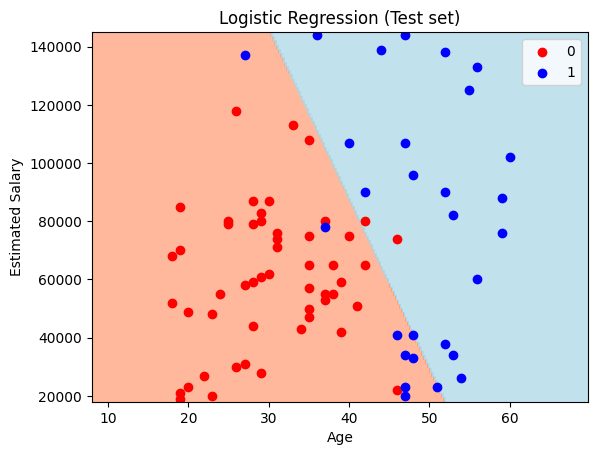

In [ ]:
# model, predict, evaluate, and plot
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightsalmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### K Nearest Neighbor

K Nearest Neighbors (KNN) is a simple supervised learning algorithm used for classification and regression. For a new data point, it finds the 'K' closest data points in the training set and predicts its class (classification) based on the majority class among its neighbors, or its value (regression) based on the average or weighted average of its neighbors' values. The "closeness" is typically determined by a distance metric like Euclidean distance.

* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg
* Choose the number of K neighbors
* Within the perimeter, count the number of each class
* New data point is assigned the class with the highest count

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[48  4]
 [ 3 25]]
0.9125


### Support Vector Classifier

Support Vector Classifier (SVC) is a supervised machine learning algorithm that finds the optimal hyperplane to separate data points of different classes in a high-dimensional space. It aims to maximize the margin (the distance between the hyperplane and the nearest data points of each class, called support vectors) to achieve good generalization.

* https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png
* Linearly separable
* Identify the hyperplane (similar to line of best fit used in regression)
* Find the support vectors
* Maximize the margin
* Identify negative and positive hyperplanes
* Compares apples that look like oranges and vice versa that reside near the margin (support vectors)


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 9 19]]
0.8625


### SVC with Kernel

Support Vector Machines (SVMs) with kernels extend the basic SVC by using kernel functions to implicitly map the original data into a higher-dimensional space. This allows the algorithm to find non-linear decision boundaries in the original space by finding a linear hyperplane in the transformed space. Common kernels include polynomial, radial basis function (RBF), and sigmoid.

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 1 27]]
0.925


### Naive Bayes

Naive Bayes is a probabilistic classifier based on Bayes' theorem. It assumes that the features are independent of each other given the class label (the "naive" assumption). Despite this simplification, it often performs well in practice, especially in text classification, due to its speed and efficiency. It calculates the probability of a data point belonging to each class and predicts the class with the highest probability.


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 3 25]]
0.9375


### Decision Tree Classifier

Decision Tree Classifier is a tree-like supervised learning algorithm that recursively splits the data based on feature values to create subsets that are increasingly pure in terms of class labels. Each internal node represents a feature test, each branch represents the outcome of the test, and each leaf node represents a class prediction. The goal is to create a model that predicts the class of a new instance by traversing the tree.

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

#### Terms

* Root node
* Splitting
* Decision node
* Leaf / terminal node
* Pruning
* Branch
* Parent and child nodes

#### Attribute Selection Measures

* Gini index
* Entropy
* Information gain
* Gain ratio
* Reduction in variance
* Chi-square

Attribute selection measures are the criteria that guide the decision tree algorithm in choosing the most effective features to split the data at each step, ultimately leading to a tree that can accurately classify or predict the target variable.

More when we talk about Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[46  6]
 [ 7 21]]
0.8375


### Random Forest Classifier

Random Forest Classifier is an ensemble learning method that builds multiple decision trees on different subsets of the data and features. For classification, it makes predictions by aggregating the votes from all the individual trees, and the class that receives the majority of votes is the final prediction. This reduces overfitting and improves the model's robustness and accuracy compared to a single decision tree.

* Random sample of X_train when building trees
* Random subsets of features
* Bagging

More when we talk about Trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 6 22]]
0.8625


## Common Functions Used in Data Science

https://deeplearningcourses.com/c/calculus-data-science

### Linear

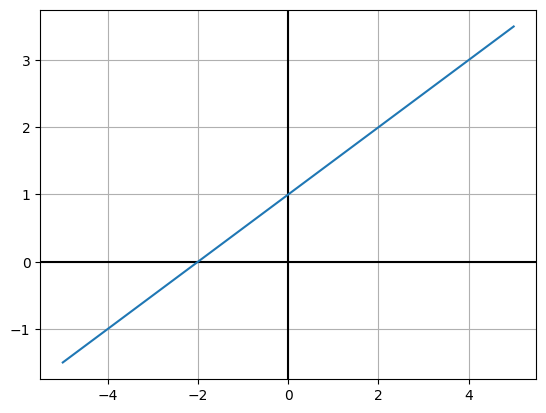

In [ ]:
# the line
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = 0.5 * x + 1
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Quadratic

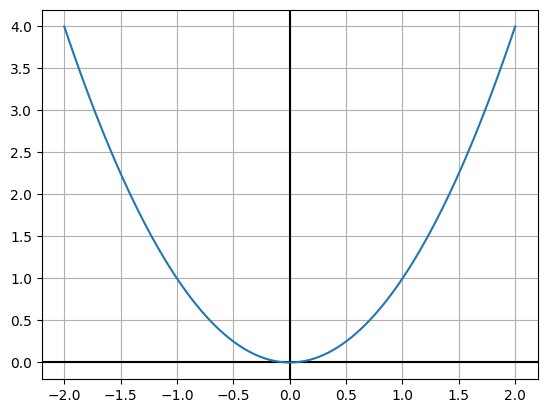

In [ ]:
# quadratic
x = np.linspace(-2, 2, 100)
y = x ** 2
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Exponential

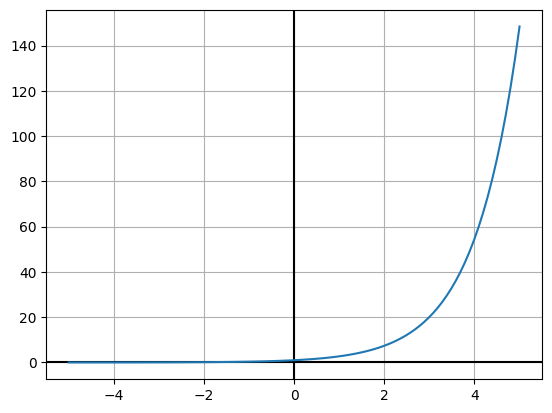

In [ ]:
# exponential
x = np.linspace(-5, 5, 100)
y = np.exp(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Log Base e

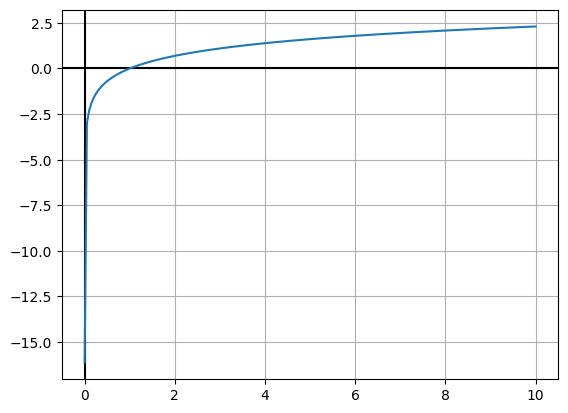

In [ ]:
# log base e (natural log)
x = np.linspace(0.0000001, 10, 200)
y = np.log(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

### Trigonometric

https://www.mathsisfun.com/algebra/trigonometry-index.html

<img src='https://www.mathsisfun.com/algebra/images/sin-cos-tan.svg' alt='sin cos tan' />

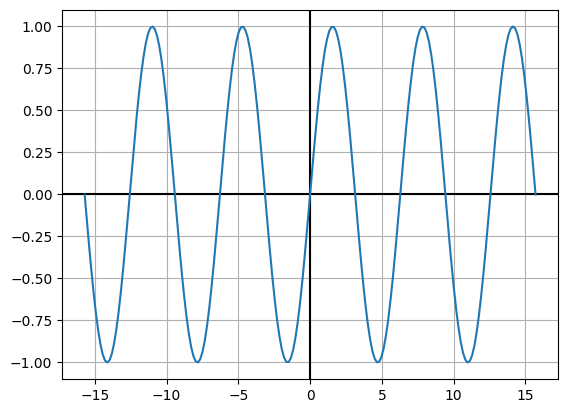

In [ ]:
# sine
x = np.linspace(-5 * np.pi, 5 * np.pi, 200)
y = np.sin(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

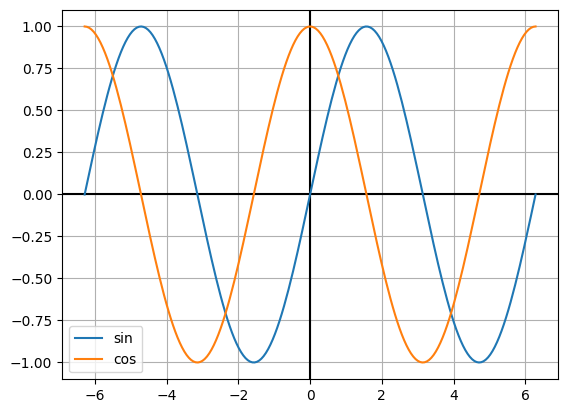

In [ ]:
# cosine
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y = np.sin(x)
y2 = np.cos(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y, label='sin');
plt.plot(x, y2, label='cos');
plt.legend();

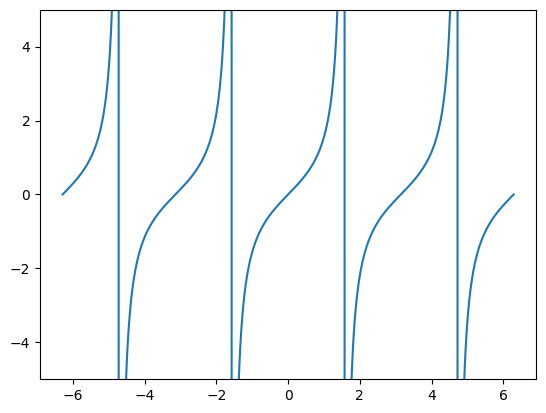

In [ ]:
# tan - https://stackoverflow.com/questions/54505852/how-to-plot-tanx-with-pyplot-and-numpy
# sin / cos
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
plt.plot(x, np.tan(x))
plt.ylim(-5, 5);

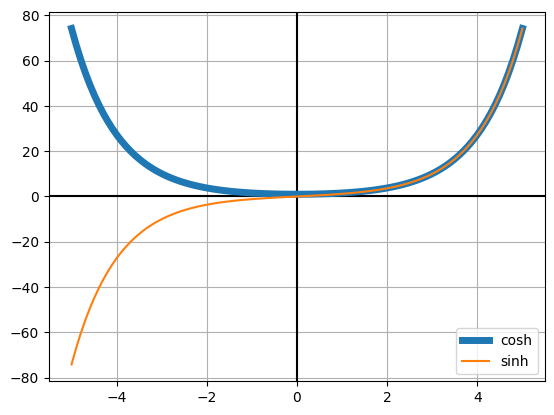

In [ ]:
# sinh and cosh (hyperbolic)
x = np.linspace(-5, 5, 100)
y = np.sinh(x)
y2 = np.cosh(x)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y2, label='cosh', linewidth=5);
plt.plot(x, y, label='sinh');
plt.legend();